In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/sample_data/pima.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# we need x and y
x = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [ ]:
# we need to preprocessing and fit tranform
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)

In [ ]:
#  we need to have train test and split the data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y,test_size=0.20)

In [ ]:
# creating and training decision tree model and fit the model
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(xtrain,ytrain)
y_pred = model1.predict(xtest)

In [ ]:
#  now for the accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy score of the decision tree is : " ,accuracy_score(ytest,y_pred))

Accuracy score of the decision tree is :  0.7077922077922078


In [ ]:
# creating and training random forest classifier
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(xtrain,ytrain)
y_pred1 = model2.predict(xtest)

In [ ]:
print("Decision Tree : ",accuracy_score(ytest,y_pred1))

Decision Tree :  0.8051948051948052


In [ ]:
# Creating dataframe for feature importance
feature_importance_df = pd.DataFrame()
feature_importance_df["features"] = x.columns
feature_importance_df["importance"] = model2.feature_importances_
feature_importance_df

,features,importance
0,Pregnancies,0.089114
1,Glucose,0.246866
2,BloodPressure,0.086650
3,SkinThickness,0.070525
4,Insulin,0.073253
5,BMI,0.167315
6,DiabetesPedigreeFunction,0.123818
7,Age,0.142459


In [ ]:
feature_importance_df.sort_values("importance")

,features,importance
3,SkinThickness,0.070525
4,Insulin,0.073253
2,BloodPressure,0.086650
0,Pregnancies,0.089114
6,DiabetesPedigreeFunction,0.123818
7,Age,0.142459
5,BMI,0.167315
1,Glucose,0.246866


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

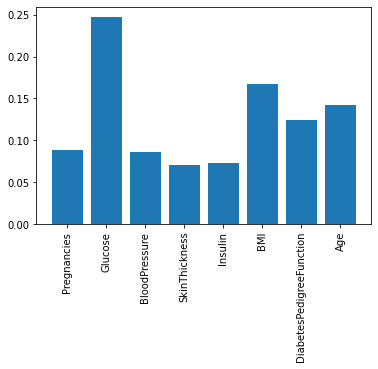

In [ ]:
# we need to plot it
import matplotlib.pyplot as plt
plt.bar(feature_importance_df["features"],feature_importance_df["importance"])
plt.xticks(rotation=90)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

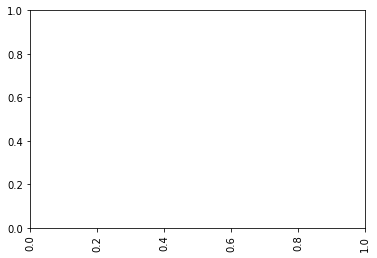